<a href="https://colab.research.google.com/github/swapnalisingh13/Advance-ML/blob/main/PCA_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PCA- Principal Component analysis.**



PCA falls into the domain of Unsupervised Machine Learning. The primary objective of PCA is to minimize the number of variables in a data collection while preserving as much information as is practical. PCA is mostly used for important feature selection and dimension reduction.
Features that are connected to independent features. In theory, PCA uses several linear combinations of the core variables to fully explain the composition of variance and covariance. PCA can be used to examine row scattering and determine properties linked to distribution.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("/content/customerTargeting.csv")
df.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [3]:
df.dtypes

g1_1      float64
g1_2        int64
g1_3        int64
g1_4        int64
g1_5        int64
           ...   
c_25      float64
c_26      float64
c_27      float64
c_28      float64
target      int64
Length: 71, dtype: object

In [4]:
df.shape

(6620, 71)

There are 71 columns and 6620 rows in the dataset.

In [5]:
df.isnull().sum()

g1_1      0
g1_2      0
g1_3      0
g1_4      0
g1_5      0
         ..
c_25      0
c_26      0
c_27      0
c_28      0
target    0
Length: 71, dtype: int64

No missing values found

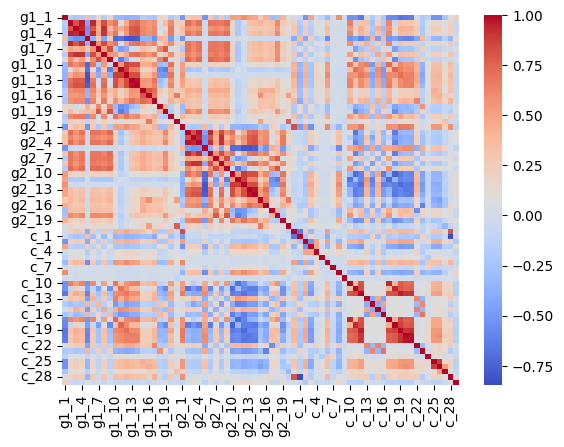

In [8]:
a=df.corr()
sns.heatmap(a,cmap='coolwarm')
plt.show()

From the heatmap its not possible to infer to which has high or low correlation.

## **Model without PCA**

In [57]:
X = df.drop('target', axis=1)
y = df['target']

In [58]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

Multipl Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [60]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred = regression_model.predict(X_test)

mse1 = mean_squared_error(y_test, y_pred)
print("Mean Squared Error without PCA: ",mse1)

Mean Squared Error without PCA:  0.49975798998398363


## **Model after PCA**

In [67]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Multiple Linear Regression

In [69]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred_pca = regression_model_pca.predict(X_test)

mse2 = mean_squared_error(y_test, y_pred_pca)
print(f"Mean Squared Error with PCA: ",mse2)

Mean Squared Error with PCA:  0.49795062376594923


## Conclusion

1.  After seeing the values of MSE's of both values we can see that both are near to each other. It means both models perform same.
2.  In this scenario, applying PCA didn't notably change the model's predictive ability as measured by MSE. It retained most of the information necessary for prediction even after reducing the dimensions.
